Implementação K-means utilizando um dataset de exemplo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Criando um dataset de pontos com duas coordenadas aleatórias (x, y):

In [ ]:
X = pd.DataFrame({'x': np.random.randint(0, 100, size=100), 'y': np.random.randint(0, 100, size=100)})
X.head()

,x,y
0,4,2
1,38,59
2,1,90
3,38,47
4,61,64


Visualizando coordenadas com o matplotlib:

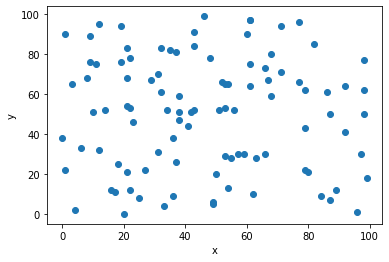

In [ ]:
plt.scatter(X['x'], X['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Implementando K-means:

In [ ]:
def kmeans(X, k, max_iter=100):
  ''' K-means implementation using pandas dataframe and
      doing max_iter iterations with random centroids initialization '''
  centroids = X.sample(k)

  for iter in range(max_iter):
    cluster = 0
    for _, c in centroids.iterrows():
      distances = []
      for _, d in X.iterrows():
        r = 0
        for z in zip(c, d):
          r += (z[0] - z[1])**2
        distances.append(np.sqrt(r))
      X[cluster] = distances
      cluster += 1


    X_temp = X.drop(['x', 'y'], axis=1)
    clusters = []
    for _, d in X_temp.iterrows():
      idx = 0
      min = d[0]
      for i in range(k):
        if d[i] < min:
          min = d[i]
          idx = i
      clusters.append(idx)
    X['Cluster'] = clusters

    # Finding new centroids
    centroids = X.groupby(['Cluster']).mean()[['x', 'y']]

  return centroids

cents = kmeans(X, 4)
cents.head()

,x,y
Cluster,,
0,70.666667,70.111111
1,24.739130,78.782609
2,23.724138,31.000000
3,71.380952,20.619048


Visualizando resultados dos pontos agrupados por clusters:

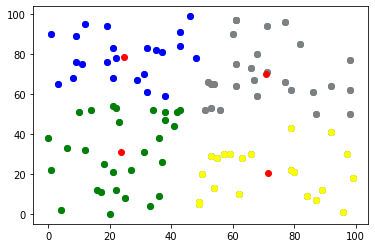

In [ ]:
plt.scatter(X['x'], X['y'])

colors = ['gray', 'blue', 'green', 'yellow', 'white', 'black']

for k in range(len(colors)):
  cluster = X[X['Cluster'] == k]
  plt.scatter(cluster['x'], cluster['y'], c=colors[k])

plt.scatter(cents['x'], cents['y'], c='red')
plt.show()